In [8]:
import yfinance as yf
import pandas as pd  # Make sure to include this import as it'll be needed later

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")  # Create a Ticker object for Tesla
tesla_data = tesla.history(period="1y")  # Get 1 year of historical data
tesla_data.reset_index(inplace=True)  # Reset the index for easier handling

# Display the stock data
print("Tesla Stock Data:")
print(tesla_data.head())  # Show the first few rows of Tesla stock data


Tesla Stock Data:
                       Date        Open        High         Low       Close  \
0 2023-09-25 00:00:00-04:00  243.380005  247.100006  238.309998  246.990005   
1 2023-09-26 00:00:00-04:00  242.979996  249.550003  241.660004  244.119995   
2 2023-09-27 00:00:00-04:00  244.259995  245.330002  234.580002  240.500000   
3 2023-09-28 00:00:00-04:00  240.020004  247.550003  238.649994  246.380005   
4 2023-09-29 00:00:00-04:00  250.000000  254.770004  246.350006  250.220001   

      Volume  Dividends  Stock Splits  
0  104636600        0.0           0.0  
1  101993600        0.0           0.0  
2  136597200        0.0           0.0  
3  117058900        0.0           0.0  
4  128346200        0.0           0.0  


In [9]:
# Fetch Tesla revenue data
tesla_income_statement = tesla.financials  # Retrieve the income statement

# Extract 'Total Revenue' row
tesla_revenue = tesla_income_statement.loc['Total Revenue']  # Access the 'Total Revenue' row

# Convert revenue data to a DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue)
tesla_revenue_df = tesla_revenue_df.reset_index()  # Reset index for readability
tesla_revenue_df.columns = ['Date', 'Total Revenue']  # Rename columns for clarity

# Display the revenue data
print("Tesla Revenue Data:")
print(tesla_revenue_df)  # Display the revenue data


Tesla Revenue Data:
        Date  Total Revenue
0 2023-12-31  96773000000.0
1 2022-12-31  81462000000.0
2 2021-12-31  53823000000.0
3 2020-12-31  31536000000.0
4 2019-12-31            NaN


In [10]:
# Fetch GameStop stock data
gamestop = yf.Ticker("GME")  # Create a Ticker object for GameStop
gamestop_data = gamestop.history(period="1y")  # Get 1 year of historical data
gamestop_data.reset_index(inplace=True)  # Reset the index for easier handling

# Display the stock data
print("GameStop Stock Data:")
print(gamestop_data.head())  # Show the first few rows of GameStop stock data


GameStop Stock Data:
                       Date       Open       High        Low      Close  \
0 2023-09-25 00:00:00-04:00  17.000000  17.719999  16.850000  17.670000   
1 2023-09-26 00:00:00-04:00  17.379999  17.820000  16.780001  16.780001   
2 2023-09-27 00:00:00-04:00  16.870001  17.260000  16.809999  17.150000   
3 2023-09-28 00:00:00-04:00  18.020000  18.100000  16.440001  16.840000   
4 2023-09-29 00:00:00-04:00  17.049999  17.260000  16.400000  16.459999   

    Volume  Dividends  Stock Splits  
0  2181200        0.0           0.0  
1  2726800        0.0           0.0  
2  1681300        0.0           0.0  
3  7431900        0.0           0.0  
4  3388600        0.0           0.0  


In [12]:
# Fetch GameStop income statement data
gamestop_income_statement = gamestop.financials  # Retrieve the income statement

# Extract 'Total Revenue' row
gamestop_revenue = gamestop_income_statement.loc['Total Revenue']  # Access the 'Total Revenue' row

# Convert revenue data to a DataFrame
gamestop_revenue_df = pd.DataFrame(gamestop_revenue)
gamestop_revenue_df = gamestop_revenue_df.reset_index()  # Reset index for readability
gamestop_revenue_df.columns = ['Date', 'Total Revenue']  # Rename columns for clarity

# Display the revenue data
print("GameStop Revenue Data:")
print(gamestop_revenue_df)  # Display GameStop's revenue DataFrame


GameStop Revenue Data:
        Date Total Revenue
0 2024-01-31  5272800000.0
1 2023-01-31  5927200000.0
2 2022-01-31  6010700000.0
3 2021-01-31  5089800000.0
4 2020-01-31           NaN


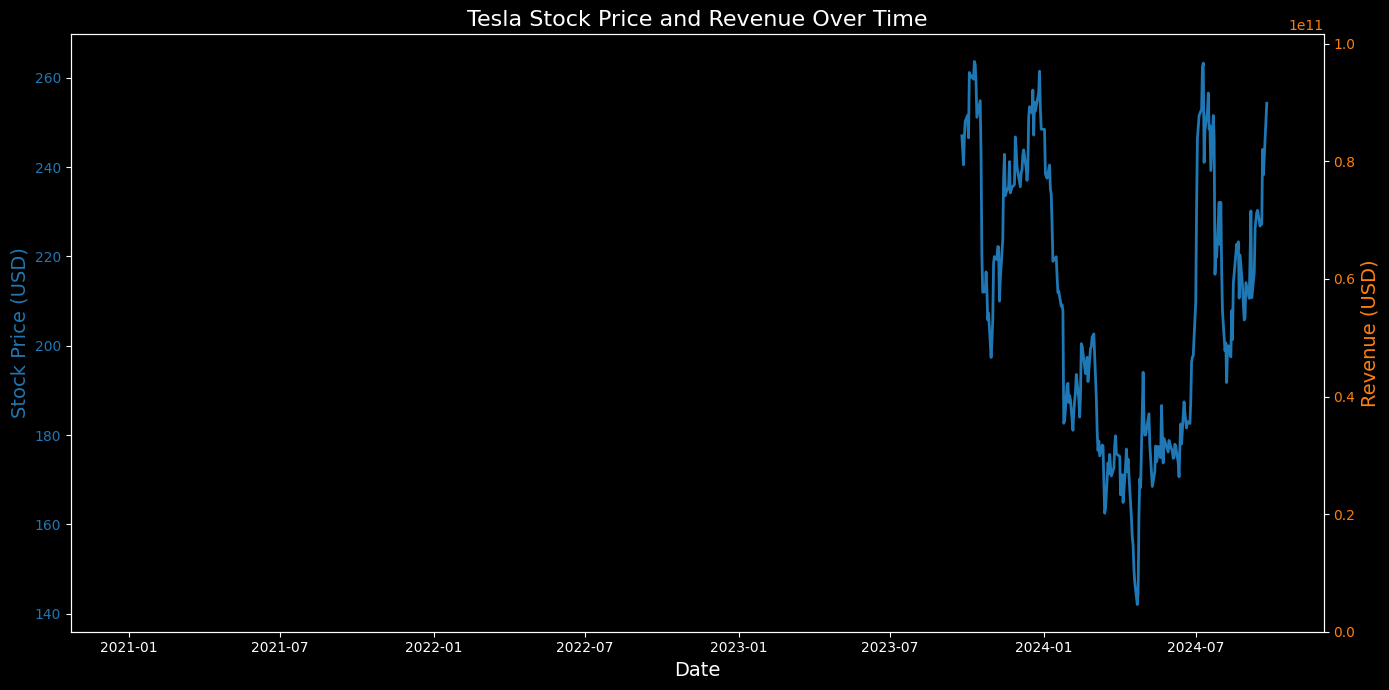

In [39]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")  # Get 1 year of stock data
tesla_data.reset_index(inplace=True)  # Reset index for easy viewing

# Step 2: Fetch Tesla revenue data
tesla_income_statement = tesla.financials  # Retrieve the income statement
tesla_revenue = tesla_income_statement.loc['Total Revenue']  # Extract 'Total Revenue'
tesla_revenue_df = pd.DataFrame(tesla_revenue)  # Convert to DataFrame
tesla_revenue_df = tesla_revenue_df.reset_index()  # Reset index for readability
tesla_revenue_df.columns = ['Date', 'Total Revenue']  # Rename columns

# Ensure Date columns are naive datetime (remove timezone if present)
tesla_data['Date'] = pd.to_datetime(tesla_data['Date']).dt.tz_localize(None)
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date']).dt.tz_localize(None)

# Merge the DataFrames
combined_df = pd.merge(tesla_data[['Date', 'Close']], tesla_revenue_df, on='Date', how='inner')

# Create subplots for clearer visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Tesla Stock Price
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Stock Price (USD)', fontsize=14, color=color)
ax1.plot(tesla_data['Date'], tesla_data['Close'], color=color, label='Tesla Stock Price', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Revenue
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Revenue (USD)', fontsize=14, color=color)
ax2.bar(tesla_revenue_df['Date'], tesla_revenue_df['Total Revenue'], color=color, alpha=0.5, label='Total Revenue')
ax2.tick_params(axis='y', labelcolor=color)

# Add title
plt.title('Tesla Stock Price and Revenue Over Time', fontsize=16)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


In [40]:
import yfinance as yf
import pandas as pd

# Fetch GameStop stock data
gamestop = yf.Ticker("GME")  # Create a Ticker object for GameStop
gamestop_data = gamestop.history(period="1y")  # Get 1 year of historical data
gamestop_data.reset_index(inplace=True)  # Reset index for easy viewing

# Display the stock data
print("GameStop Stock Data:")
print(gamestop_data.head())  # Print the first few rows of GameStop stock data


GameStop Stock Data:
                       Date       Open       High        Low      Close  \
0 2023-09-25 00:00:00-04:00  17.000000  17.719999  16.850000  17.670000   
1 2023-09-26 00:00:00-04:00  17.379999  17.820000  16.780001  16.780001   
2 2023-09-27 00:00:00-04:00  16.870001  17.260000  16.809999  17.150000   
3 2023-09-28 00:00:00-04:00  18.020000  18.100000  16.440001  16.840000   
4 2023-09-29 00:00:00-04:00  17.049999  17.260000  16.400000  16.459999   

    Volume  Dividends  Stock Splits  
0  2181200        0.0           0.0  
1  2726800        0.0           0.0  
2  1681300        0.0           0.0  
3  7431900        0.0           0.0  
4  3388600        0.0           0.0  
